In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('height-weight.csv')

In [25]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,23.0,73.826087,17.872407,45.0,59.0,78.0,86.0,105.0
Height,23.0,158.391304,19.511626,120.0,142.5,162.0,175.0,183.0


In [29]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


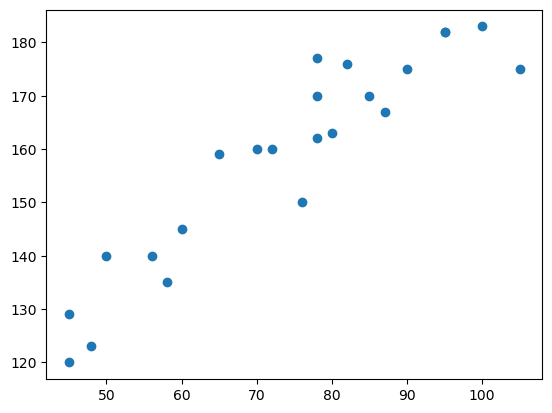

In [33]:
plt.scatter(df.Weight , df.Height)

In [35]:
X = df[['Weight']]
y = df['Height']

In [37]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


# Split the data intto train and split 

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2 , random_state = 1)

In [86]:
# #Always perform scaling after train test split
# #y/target variable should not be scaled
# #avoid scaling categorical features
# X_train = scaler.fit_transform(X_train) #for train data use fit_transform
# X_test = scaler.transform(X_test) #for test use only transform as it is representative of unknown data>> 

In [50]:
X_train.shape

(18, 1)

In [54]:
X_test.shape

(5, 1)

In [56]:
from sklearn.linear_model import LinearRegression

In [ ]:
#linear regression parameters:
#fit_intercept >> The best fit line will have intercept, by default it is true
#copy__X >> copy the original X_train and then build the model, dont modify the original data,by default>>true
#n_jobs >> processor you want to use
#positive>> you want all of your coefficient to be positive


#After building the model, you have attributes of the mode
#coef
#intercept

In [58]:
model = LinearRegression()

In [60]:
model

LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
model.coef_

array([1.05780061])

In [70]:
model.intercept_

80.0827432511061

In [74]:
y_pred = model.predict(X_test)

In [76]:
y_pred

array([127.68377082, 148.83978307, 143.55078001, 185.86280451,
       172.11139655])

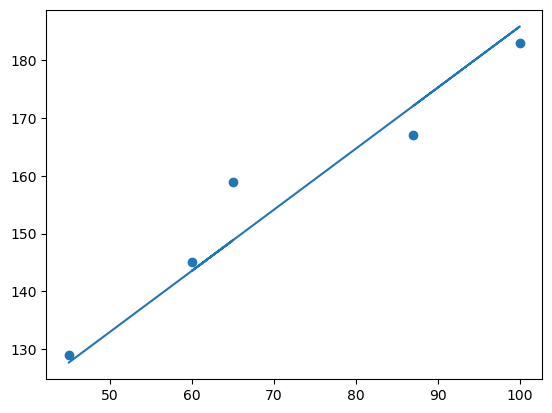

In [78]:
plt.scatter(X_test , y_test)
plt.plot(X_test ,y_pred)

In [80]:
from sklearn.metrics import mean_squared_error

In [94]:
mse = mean_squared_error(y_test , y_pred)

In [96]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [98]:
mean_absolute_error(y_test , y_pred)

4.179973432576918

In [92]:
# rmse 

In [100]:
rmse = np.sqrt(mse)

In [102]:
rmse

5.317607173232324

In [104]:
# lesser the error , better the model 

In [106]:
from sklearn.metrics import r2_score

In [120]:
score= r2_score(y_test,y_pred)


In [116]:
# adjusted r 2
#adjusted r square
#R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] #n is no of obs, k is no predictor varaiables

In [122]:
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] -1)
#adjusted r square will be always lesser than rsquare

0.8895776864698068

In [124]:
score

0.9171832648523551

In [128]:
#residual/error
error = y_test - y_pred
error

20     1.316229
17    10.160217
3      1.449220
13    -2.862805
19    -5.111397
Name: Height, dtype: float64